## Dog Licenses
https://data.wprdc.org/dataset/allegheny-county-dog-licenses



This dataset keeps track of every dog licenses that is registered, keeping track of the type of dog, fur color, neuter/spay status and zipcode for each holder.
Fellow dog owners is a great marker for the kind of neighborhood we're looking for. Not only does that mean there are plenty of other dogs to play with, but it also implies that these neighborhoods offer some ammenities or include facilities suitable for dogs. 

After importing pandas, we can take a peek at what the raw data looks like:

In [26]:
import pandas as pd

lic = pd.read_csv("dog-licenses.csv", sep=",")
lic.head(10)

,_id,LicenseType,Breed,Color,DogName,owner_zip,ExpYear,ValidDate
0,4119028,Dog Individual Neutered Male,COCKAPOO,BROWN,CHARLEY,15236,2024,2023-12-05T12:14:29
1,4119029,Dog Individual Neutered Male,TAG,WHITE/BLACK/BROWN,BOOMER,15090,2024,2023-12-05T12:15:12
2,4119030,Dog Senior Citizen or Disability Spayed Female,GER SHEPHERD,WHITE,ELLIE,15238,2024,2023-12-05T12:18:37
3,4119031,Dog Individual Neutered Male,MALTESE,WHITE,FURBY,15243,2024,2023-12-05T12:35:22
4,4119032,Dog Individual Neutered Male,MALTESE,WHITE,GIZMO,15243,2024,2023-12-05T12:35:22
5,4119033,Dog Individual Neutered Male,MIXED,WHITE/TAN,HUGO,15241,2024,2023-12-05T12:41:12
6,4119034,Dog Individual Male,RAT TERRIER,BROWN,BANJO,15221,2024,2023-12-05T12:43:57
7,4119035,Dog Individual Neutered Male,SIB HUSKY MIX,WHITE/BROWN,BOLT,15209,2024,2023-12-05T13:25:39
8,4119036,Dog Individual Neutered Male,AM PIT BULL TERRIER,BLACK,JED WAYNE,15229,2024,2023-12-05T13:33:49
9,4119037,Dog Individual Neutered Male,AM STAFF TERRIER,WHITE/BLACK,SAMSON,15229,2024,2023-12-05T13:34:45



##### With over 67,000 entries and 130 zipcodes in the dataset, lets narrow it down to those with the most registed licenses :


In [30]:
lic = pd.read_csv("dog-licenses.csv", sep=",")
best = lic['owner_zip'].value_counts().head(10)
print(best)

owner_zip
15237    2874
15108    2845
15044    2461
15102    2400
15235    2159
15146    2063
15236    1934
15101    1932
15239    1807
15136    1621
Name: count, dtype: int64



#### We've got some pretty strong leads, with the tope two have almost double the total registered in the 10th place zipcode. 

I don't feel right leaving it like this, however. I think that I can be narrowed down ever just a little bit more. I went through the liberty of removing just a few breeds. There are a few that I would avoid completely if I were a dog. This includes annoying dogs, some ugly dogs, prissy dogs, etc. **This is not objective -- I am very biased against dogs** 

In [89]:

#print(lic['Breed'].unique())
breeds_to_exclude = ['CHIHUAHUA', 'American Bully', 'ROTTWEILER MIX', 'YORKSHIRE TERRIER',  'AM PITT BULL MIX', 'PUG', 'BICHON FRISE', 'AM ESKIMO DOG',
    'SCHNAUZER MIN', 'SHIH TZU', 'PUGGLE', 'SCHNOODLE', 'PUGGLE', 'PEKINGESE', 'POMERANIAN', 'MALTESE', 'BOSTON TERRIER', 'AM PIT BULL TERRIER', 
       'CHIHUAHUA MIX', 'SHIH TZU MIX', 'FRENCH BULLDOG', 'BOXER', 'DACHSHUND']

filtered_lic = lic[~lic['Breed'].isin(breeds_to_exclude)]
filt_best = filtered_lic['owner_zip'].value_counts().head(10)
print(filt_best)

owner_zip
15237    2320
15108    2265
15044    2037
15102    1955
15101    1577
15235    1572
15146    1560
15236    1517
15239    1423
15090    1326
Name: count, dtype: int64



While the top four results for these two data pulls weren't affected by the exclusions, there are some notable changes otherwise. Neighborhoods like Allison shot up in the rankings and the last place entry encludes two distict neighborhoods not included in the other. 

Heres a visual representation

<Figure size 1400x600 with 0 Axes>

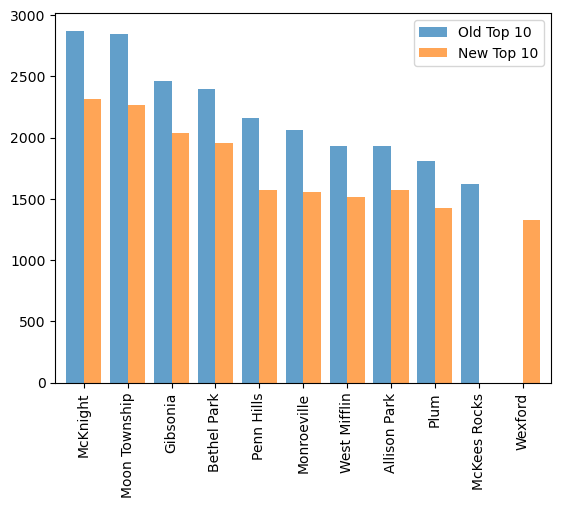

In [91]:
import matplotlib.pyplot as plt

best_dict = {"McKnight": 2874, "Moon Township": 2845, "Gibsonia": 2461, "Bethel Park": 2400,"Penn Hills": 2158,  "Monroeville": 2063, 
             "West Mifflin": 1934, "Allison Park": 1932, "Plum": 1807, "McKees Rocks": 1621}

filt_best_dict = {"McKnight": 2320, "Moon Township": 2265, "Gibsonia": 2037, "Bethel Park": 1955,"Allison Park": 1577,  "Penn Hills": 1572, 
             "Monroeville": 1560, "West Mifflin": 1517, "Plum": 1423, "Wexford": 1326}
compare = pd.DataFrame({'Old Top 10': best_dict, 'New Top 10': filt_best_dict})
plt.figure(figsize=(14, 6))
compare.plot(kind='bar', alpha=0.7, width=0.8)

plt.show()

## Sub-Conclusion

The neighborhoods of the McKnight and Moon Township areas are top two choices, holding the greatest number of registered dog licenses, even after the attempts to discriminate against certain breeds. 